### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 7 - SOLUTION</span>

All c++ code is stored into exercize_xx/es_xx.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

### Exercise 07.1

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit

Evaluate step needed to allow system to reach equilibrium:

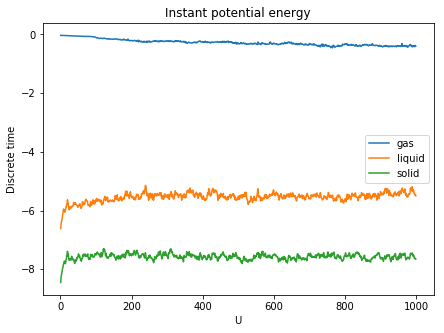

In [36]:
plt.figure(figsize=(7,5))
plt.title('Instant potential energy')
plt.xlabel('U')
plt.ylabel('Discrete time')

t, y= np.loadtxt("data/thermalization/output.epot.therm.gas", \
                               usecols=(0,1), unpack='true')
plt.plot(t,y, label='gas')
t, y= np.loadtxt("data/thermalization/output.epot.therm.liquid", \
                               usecols=(0,1), unpack='true')
plt.plot(t,y, label='liquid')

t, y= np.loadtxt("data/thermalization/output.epot.therm.solid", \
                               usecols=(0,1), unpack='true')
plt.plot(t,y, label='solid')

plt.legend()
plt.show()

Plot of instant potential energy for solid and liquid phase show that  200 steps are enough to reach equilibrium. For gas phase are enoug 2000.
Now we can evaluate autocorrelation function and fit it with exponential funciton to obtain correlation time $t_c$.

Define exponential function for fit:

In [37]:
def func(t, tc):
    return np.exp(-t/tc)

Define autocorrelation function:

In [38]:
def autocovariance(x, lag):
    n = len(x)
    variance = np.var(x)
    mean = np.mean(x)
    lag_mean=0
    for i in range(1,n-lag):
        lag_mean += (x[i]-mean)*(x[i+lag]-mean)
            
    return lag_mean

def autocorrelation(x,lag):
    return autocovariance(x,lag)/autocovariance(x,0)


- **Potential energy:**

correlation time for gas: 151.452
correlation time for liquid: 10.686
correlation time for solid: 11.133


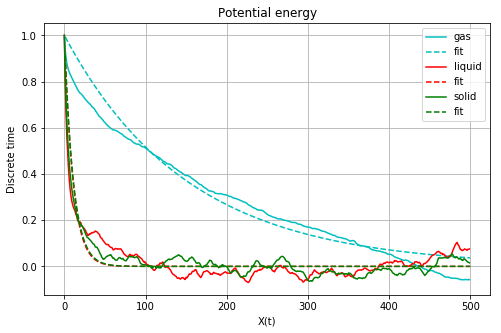

In [56]:
plt.figure(figsize=(8,5))
plt.title('Potential energy')
plt.xlabel('X(t)')
plt.ylabel('Discrete time')
plt.grid(True)
max_lag=500

# Gas
t_ge, y_ge= np.loadtxt("data/gas/output.epot.instant", usecols=(0,1), unpack='true')
k=[autocorrelation(y_ge,j) for j in range(max_lag)]
plt.plot(k,'c-', label='gas')
# Fit with exp
popt, pcov = curve_fit(func, t_ge[:max_lag], k)
plt.plot(t_ge[:max_lag], func(t_ge[:max_lag],1*popt), 'c-', linestyle='dashed', label="fit")
print('correlation time for gas: '+str(round(popt[0],3)))

# Liquid
t_le, y_le= np.loadtxt("data/liquid/output.epot.instant", usecols=(0,1), unpack='true')
k=[autocorrelation(y_le,j) for j in range(max_lag)]
plt.plot(k,'r-', label='liquid')
popt, pcov = curve_fit(func, t_le[:max_lag], k)
plt.plot(t_le[:max_lag], func(t_le[:max_lag],1 *popt), 'r-', linestyle='dashed', label="fit")
print('correlation time for liquid: '+str(round(popt[0],3)))

# Solid
t_se, y_se= np.loadtxt("data/solid/output.epot.instant", usecols=(0,1), unpack='true')
k=[autocorrelation(y_se,j) for j in range(max_lag)]
plt.plot(k,'g-', label='solid')
popt, pcov = curve_fit(func, t_se[:max_lag], k)
plt.plot(t_se[:max_lag], func(t_se[:max_lag],1 *popt), 'g-', linestyle='dashed', label="fit")
print('correlation time for solid: '+str(round(popt[0],3)))

plt.legend()
plt.show()

- **Pressure:**

correlation time for gas: 4.565
correlation time for liquid: 16.012
correlation time for solid: 10.929


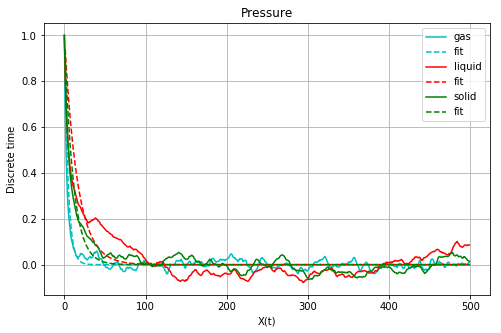

In [98]:
plt.figure(figsize=(8,5))
plt.title('Pressure')
plt.xlabel('X(t)')
plt.ylabel('Discrete time')
plt.grid(True)
max_lag=500

# Gas
t_gp, y_gp = np.loadtxt("data/gas/output.pres.instant", usecols=(0,1), unpack='true')
k=[autocorrelation(y_gp,j) for j in range(max_lag)]
plt.plot(k,'c-', label='gas')
popt, pcov = curve_fit(func, t_gp[:max_lag], k)
plt.plot(t_gp[:max_lag], func(t_gp[:max_lag],1*popt), 'c-', linestyle='dashed', label="fit")
print('correlation time for gas: '+str(round(popt[0],3)))

# Liquid
t_lp, y_lp = np.loadtxt("data/liquid/output.pres.instant", usecols=(0,1), unpack='true')
k=[autocorrelation(y_lp,j) for j in range(max_lag)]
plt.plot(k,'r-', label='liquid')
popt, pcov = curve_fit(func, t_lp[:max_lag], k)
plt.plot(t_lp[:max_lag], func(t_lp[:max_lag],1 *popt), 'r-', linestyle='dashed', label="fit")
print('correlation time for liquid: '+str(round(popt[0],3)))

# Solid
t_sp, y_sp = np.loadtxt("data/solid/output.pres.instant", usecols=(0,1), unpack='true')
k=[autocorrelation(y_sp,j) for j in range(max_lag)]
plt.plot(k,'g-', label='solid')
popt, pcov = curve_fit(func, t_sp[:max_lag], k)
plt.plot(t_sp[:max_lag], func(t_sp[:max_lag],1 *popt), 'g-', linestyle='dashed', label="fit")
print('correlation time for solid: '+str(round(popt[0],3)))

plt.legend()
plt.show()

We can consider two samples indipendent when sampled every 2$t_c$. So our blocks need to be at least 300 for gas phase, 30 for solid and 20 for liquid.

Using the data blocking tecnique study the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks from blk_len$=10$ to blk_len$=5\times 10^3$. Define data blocking tecnique function:

In [65]:
def block_statistic(x, blk_len):
    mcstep=len(x)
    n_blks=int(mcstep/blk_len)
    glob_avg=0
    glob_avg2=0
    mean = np.zeros(n_blks)
    error = np.zeros(n_blks)
    
    for i in range(n_blks):
        blk_avg=0
        for j in range(blk_len):
            blk_avg += x[j+blk_len*i]
        blk_avg /= blk_len
        
        glob_avg += blk_avg
        glob_avg2 += (blk_avg*blk_avg)

        mean[i] = glob_avg/(i+1)
        if(i!=0):
            error[i] = np.sqrt((glob_avg2/(i+1)-np.power(glob_avg/(i+1),2))/i)

    return mean, error

- **Potential energy:**

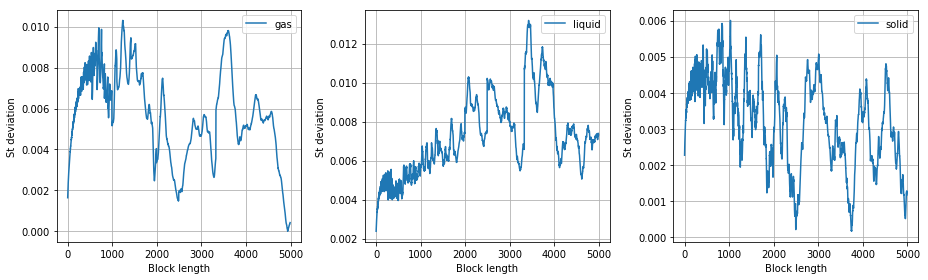

In [94]:
error_ge = []
error_le = []
error_se = []
for blk_len in range(10,5000):    
    error_ge.append(block_statistic(y_ge, blk_len)[1][-1])
    error_le.append(block_statistic(y_le, blk_len)[1][-1])
    error_se.append(block_statistic(y_se, blk_len)[1][-1])

plt.figure(figsize=(13,4))
# Using subplot ambient to draw graphs side by side
plt.subplot(131)
plt.plot(error_ge, label='gas')
plt.legend ()
plt.xlabel('Block length')
plt.ylabel('St deviation')
plt.grid(True)

plt.subplot(132)
plt.plot(error_le, label='liquid')
plt.legend ()
plt.xlabel('Block length')
plt.ylabel('St deviation')
plt.grid(True)

plt.subplot(133)
plt.plot(error_se, label='solid')
plt.legend ()
plt.xlabel('Block length')
plt.ylabel('St deviation')
plt.grid(True)

plt.tight_layout()
plt.show()

- **Pressure:**

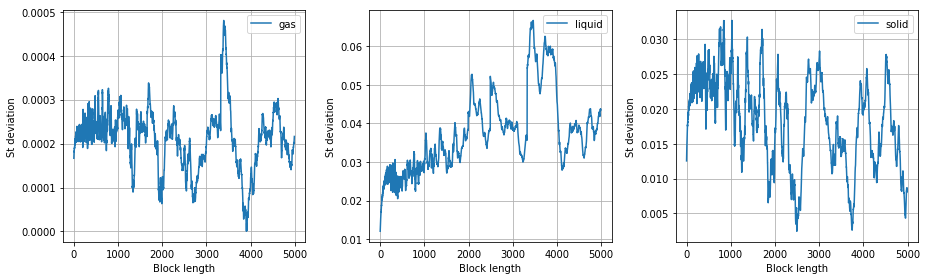

In [101]:
error_gp = []
error_lp = []
error_sp = []

for blk_len in range(10,5000):    
    error_gp.append(block_statistic(y_gp, blk_len)[1][-1])
    error_lp.append(block_statistic(y_lp, blk_len)[1][-1])
    error_sp.append(block_statistic(y_sp, blk_len)[1][-1])

plt.figure(figsize=(13,4))
# Using subplot ambient to draw graphs side by side
plt.subplot(131)
plt.plot(error_gp, label='gas')
plt.legend ()
plt.xlabel('Block length')
plt.ylabel('St deviation')
plt.grid(True)

plt.subplot(132)
plt.plot(error_lp, label='liquid')
plt.legend ()
plt.xlabel('Block length')
plt.ylabel('St deviation')
plt.grid(True)

plt.subplot(133)
plt.plot(error_sp, label='solid')
plt.legend ()
plt.xlabel('Block length')
plt.ylabel('St deviation')
plt.grid(True)

plt.tight_layout()
plt.show()

The uncertains don't show a regualar trend, and for blocks that are large enough seems to oscillate more around a specific value.

### Exercise 07.2